In [ ]:
from datetime import datetime

import matplotlib
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

globalMin = -20
globalMax = 20
globalDotCount = 40
globalBoxSize = 5
globalFigureSize = 14

In [35]:
# 从Leetcode上摘抄下来的，问题的全名为：1125.Smallest Sufficient Team
def smallestSufficientTeam(req_skills, people):
    n, m = len(req_skills), len(people)
    key = {v: i for i, v in enumerate(req_skills)}
    dp = {0: []}
    for i, p in enumerate(people):
        his_skill = 0
        for skill in p:
            if skill in key:
                his_skill |= 1 << key[skill]
        for skill_set, need in dp.copy().items():
            with_him = skill_set | his_skill
            if with_him == skill_set:
                continue
            if with_him not in dp or len(dp[with_him]) > len(need) + 1:
                dp[with_him] = need + [i]
    return dp[(1 << n) - 1]


def benchmark(sz):
    rng = np.random.default_rng()
    countlist = rng.integers(1, 6, size=sz)
    idxlist = list(range(40))
    totalist = []
    partlist = []
    for tmpcount in countlist:
        tmplist = rng.choice(idxlist, tmpcount)
        partlist.append(tmplist)
        totalist.extend(tmplist)
    totalist = list(set(totalist))
    smallestSufficientTeam(totalist, partlist)
    # print(smallestSufficientTeam(totalist, partlist))
    pass

print(smallestSufficientTeam([2, 3, 1, 4], [[1, 2, 5], [2, 3], [3, 4]]))

[0, 2]


In [36]:
benchres = %timeit -o benchmark(2)

109 µs ± 873 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
benchres = %timeit -o benchmark(4)

In [ ]:
benchres = %timeit -o benchmark(20)

In [37]:
listx = []
listy = []
for tmpsz in range(2, 25):
    benchres = %timeit -o benchmark(tmpsz)
    listx.append(tmpsz)
    listy.append(benchres.average)
    pass

107 µs ± 691 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
134 µs ± 871 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
160 µs ± 1.25 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
189 µs ± 1.32 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
223 µs ± 2.58 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
263 µs ± 2.66 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
319 µs ± 2.36 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
401 µs ± 6.02 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
529 µs ± 5.07 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
749 µs ± 4.53 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.1 ms ± 13.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.74 ms ± 13.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.88 ms ± 118 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.8 ms ± 314 µs per loop (mean ± std. dev. of 7 runs, 100 loop

In [ ]:
listx1 = []
listy1 = []
for tmpsz in range(25, 40):
    benchres = %timeit -o benchmark(tmpsz)
    listx1.append(tmpsz)
    listy1.append(benchres.average)
    pass

The slowest run took 6.66 times longer than the fastest. This could mean that an intermediate result is being cached.
628 ms ± 289 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.09 s ± 404 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The slowest run took 6.31 times longer than the fastest. This could mean that an intermediate result is being cached.
1.11 s ± 908 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The slowest run took 5.87 times longer than the fastest. This could mean that an intermediate result is being cached.
2.24 s ± 1.03 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
The slowest run took 10.98 times longer than the fastest. This could mean that an intermediate result is being cached.
3.98 s ± 3.66 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
The slowest run took 12.87 times longer than the fastest. This could mean that an intermediate result is being cached.
6.14 s ± 6.43 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
8.54 s

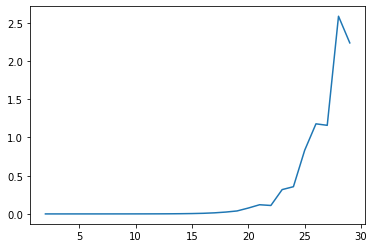

In [42]:
x = []
y = []
x.extend(listx)
x.extend(listx1)
y.extend(listy)
y.extend(listy1)
plt.plot(x, y)

In [ ]:
dir(benchres)

In [ ]:
# 生成随机点
def createUniformRandomDots(minVal, maxVal, count):
    dots = np.random.default_rng().uniform(minVal, maxVal, (count, 2))
    resdf = pd.DataFrame(dots, columns=["X", "Y"])
    plt.figure(figsize=(globalFigureSize, globalFigureSize))
    plt.xlim([globalMin - globalBoxSize, globalMax + globalBoxSize])
    plt.plot(resdf["X"], resdf["Y"], ".")
    plt.show()
    return resdf

In [ ]:
# 设置每点所对应的方块
def setBox(row, xy, boxSize, result):
    if (
        xy[0] <= row["X"] < xy[0] + boxSize
        and xy[1] <= row["Y"] < xy[1] + boxSize
        and len(row["BoxLoc"]) == 0
    ):
        row["BoxLoc"].append(xy[0])
        row["BoxLoc"].append(xy[1])
        result.append((xy[0], xy[1]))


# 计算所需方块 - 全区域随机生成正方块
def calculateSurroundedBoxes(minVal, maxVal, dots, boxSize):
    dots["BoxLoc"] = dots.apply(lambda x: [], axis=1)
    result = []
    start = datetime.now()
    rowCount = len(dots)
    while True:
        xyArray = np.random.default_rng().uniform(minVal, maxVal, 2)
        dots.apply(lambda tmprow: setBox(tmprow, xyArray, boxSize, result), axis=1)
        if dots["BoxLoc"].map(lambda r: len(r)).sum() == rowCount * 2:
            break
    # print("running time :", datetime.now() - start)
    return result


# 计算所需方块 - 围绕着每一个点随机生成正方块
# 将数据集中尚未设定方块信息的空点，且位于此方块内的点的正方块设定为此
def calculateSurroundedBoxes2(minVal, maxVal, dots, boxSize):
    dots["BoxLoc"] = dots.apply(lambda x: [], axis=1)
    result = []
    start = datetime.now()
    rowCount = len(dots)
    while True:
        # 遍历出第一个未设定正方块的点
        tmpx = None
        tmpy = None
        for index, row in dots.iterrows():
            if len(row["BoxLoc"]) <= 0:
                tmpx = row["X"]
                tmpy = row["Y"]
                break
            pass

        shiftArray = np.random.default_rng().uniform(0, globalBoxSize, 2)
        tmpx = tmpx - shiftArray[0]
        tmpy = tmpy - shiftArray[1]

        for index, row in dots.iterrows():
            if (
                tmpx < row["X"] < tmpx + globalBoxSize
                and tmpy < row["Y"] < tmpy + globalBoxSize
                and len(row["BoxLoc"]) <= 0
            ):
                row["BoxLoc"].append(tmpx)
                row["BoxLoc"].append(tmpy)
                result.append((tmpx, tmpy))
            pass

        if dots["BoxLoc"].map(lambda r: len(r)).sum() == rowCount * 2:
            break
    # print("running time :", datetime.now() - start)
    return result


# 计算所需方块 - 围绕着每一个点随机生成正方块
# 每个点都保有一个正方块列表，针对这些正方块，按照包含点的个数逐个选拔
def calculateSurroundedBoxes2_2(dots):
    dots["BoxLoc"] = dots.apply(lambda x: [], axis=1)
    result = []
    start = datetime.now()
    boxDic = {}
    # 围绕每一个点随机生成正方形
    for index, row in dots.iterrows():
        tmpx = row["X"]
        tmpy = row["Y"]
        shiftArray = np.random.default_rng().uniform(0, globalBoxSize, 2)
        tmpx = tmpx - shiftArray[0]
        tmpy = tmpy - shiftArray[1]
        boxDic[(tmpx, tmpy)] = []
        # 从头遍历，设定正方形
        for tmpidx, tmprow in dots.iterrows():
            if (
                tmpx < tmprow["X"] < tmpx + globalBoxSize
                and tmpy < tmprow["Y"] < tmpy + globalBoxSize
            ):
                tmprow["BoxLoc"].append((tmpx, tmpy))
                boxDic[(tmpx, tmpy)].append(tmpidx)
        pass

    while True:
        sortedlist = sorted(boxDic.items(), key=lambda item: len(item[1]), reverse=True)
        tmp = sortedlist[0]
        if len(tmp[1]) > 0:
            result.append(tmp[0])
            dellist = tmp[1].copy()
            for vlist in boxDic.values():
                for idx in dellist:
                    if idx in vlist:
                        vlist.remove(idx)
                pass
            pass
        else:
            break
    return result


# abs(row["X"] - tmprow["X"]) < globalBoxSize / 2 肯定是最坏结果
# abs(row["X"] - tmprow["X"]) < globalBoxSize 会出现围绕某一点的簇，最大值 - 最小值 > globalBoxSize的情况
# 使用二分法来求最终解
def recurSetBox(dots, levellist, topthres, currentthres, bottomthres):
    for index, row in dots.iterrows():
        row["Siblings"].clear()

    # 计算每个点的相邻点
    for index, row in dots.iterrows():
        for tmpidx, tmprow in dots.iterrows():
            if (
                index != tmpidx
                and abs(row["X"] - tmprow["X"]) < currentthres
                and abs(row["Y"] - tmprow["Y"]) < currentthres
            ):
                row["Siblings"].append(tmpidx)
                pass
            elif index == tmpidx:
                row["Siblings"].append(tmpidx)
                pass
            pass
        pass

    # 查找元素个数超过2个，且簇的最大值和最小值的差大于globalBoxSize
    onetwolist = []
    threeormorelist = []
    overlist = []
    for index, row in dots.iterrows():
        if len(row["Siblings"]) <= 2:
            onetwolist.append(index)
        else:
            threeormorelist.append(index)
            tmpselectedx = dots.loc[row["Siblings"], "X"]
            tmpselectedy = dots.loc[row["Siblings"], "Y"]
            if (
                tmpselectedx.max() - tmpselectedx.min() >= globalBoxSize
                or tmpselectedy.max() - tmpselectedy.min() >= globalBoxSize
            ):
                overlist.extend(row["Siblings"])
                pass
        pass
    # 如果overlist非空
    if len(overlist) > 0:
        levellist[0] += 1
        recurSetBox(
            dots, levellist, currentthres, (currentthres + bottomthres) / 2, bottomthres
        )
    else:
        if levellist[0] <= 100:
            levellist[0] += 1
            recurSetBox(
                dots,
                levellist,
                topthres,
                (topthres + bottomthres) / 2,
                currentthres,
            )
        pass
    pass


# 生成方块的左下角坐标
# 方块按照左下 --> 右上铺开
def calculateSurroundedBoxes4(dots):
    boxDic = {}
    for idx, row in dots.iterrows():
        foundFlag = False
        for tmpidx, tmprow in dots.iterrows():
            if idx == tmpidx:
                continue
            else:
                if (
                    row["Y"] >= tmprow["Y"]
                    and row["X"] <= tmprow["X"]
                    and row["Y"] - tmprow["Y"] < globalBoxSize
                    and tmprow["X"] - row["X"] < globalBoxSize
                ):
                    foundFlag = True
                    tmpx = row["X"]
                    tmpy = tmprow["Y"]
                    if (tmpx, tmpy) not in boxDic:
                        boxDic[(tmpx, tmpy)] = []
                pass
            pass
        if foundFlag == False:
            if (row["X"], row["Y"]) not in boxDic:
                boxDic[(row["X"], row["Y"])] = []
        pass
    for idx, row in dots.iterrows():
        for key, value in boxDic.items():
            if (
                row["X"] - key[0] >= 0
                and row["X"] - key[0] < globalBoxSize
                and row["Y"] - key[1] >= 0
                and row["Y"] - key[1] < globalBoxSize
            ):
                value.append(idx)
                pass
            pass
        pass
    result = []
    diclist = sorted(boxDic.items(), key=lambda item: len(item[1]), reverse=False)
    print(f"List length is {len(diclist)}.")
    delist = []
    for idx, val in enumerate(diclist):
        for tmpidx, tmpval in enumerate(diclist):
            if tmpidx > idx:
                if set(val[1]).issubset(set(tmpval[1])):
                    delist.append(idx)
                    break
            pass
        pass
    print(f"Total {len(delist)} would be deleted.")
    delist.reverse()
    for idx in delist:
        del diclist[idx]
    target = []
    candidate = []
    for tmpitem in diclist:
        candidate.append(tmpitem[1])
        target.extend(tmpitem[1])
    target = list(set(target))
    idxlist = smallestSufficientTeam(target, candidate)
    for tmpidx in idxlist:
        tmpx = (
            dots.loc[diclist[tmpidx][1], "X"].max()
            + dots.loc[diclist[tmpidx][1], "X"].min()
        ) / 2
        tmpy = (
            dots.loc[diclist[tmpidx][1], "Y"].max()
            + dots.loc[diclist[tmpidx][1], "Y"].min()
        ) / 2
        result.append((tmpx - globalBoxSize / 2, tmpy - globalBoxSize / 2))
    return result
    pass


# 根据点在x轴和y轴的投影信息计算正方形
def calculateSurroundedBoxes3(dots):
    # 清空正方形
    dots["BoxLoc"] = dots.apply(lambda x: [], axis=1)
    dots["Siblings"] = dots.apply(lambda x: [], axis=1)
    dots["SibCount"] = 0

    # 计算每个点的相邻点
    for index, row in dots.iterrows():
        for tmpidx, tmprow in dots.iterrows():
            if (
                index != tmpidx
                and abs(row["X"] - tmprow["X"]) < globalBoxSize
                and abs(row["Y"] - tmprow["Y"]) < globalBoxSize
            ):
                row["Siblings"].append(tmpidx)
                pass
            elif index == tmpidx:
                row["Siblings"].append(tmpidx)
                pass
            pass
        pass
    print("Raw siblings info", dots)

    # 查找元素个数超过2个，且簇的最大值和最小值的差大于globalBoxSize
    onetwolist = []
    threeormorelist = []
    overlist = []
    for index, row in dots.iterrows():
        if len(row["Siblings"]) <= 2:
            onetwolist.append(index)
        else:
            threeormorelist.append(index)
            tmpselectedx = dots.loc[row["Siblings"], "X"]
            tmpselectedy = dots.loc[row["Siblings"], "Y"]
            if (
                tmpselectedx.max() - tmpselectedx.min() >= globalBoxSize
                or tmpselectedy.max() - tmpselectedy.min() >= globalBoxSize
            ):
                overlist.extend(row["Siblings"])
                pass
        pass

    if len(overlist) > 0:
        r, c = dots.shape
        selectedlist = list(range(r))
        for tmprm in onetwolist:
            selectedlist.remove(tmprm)
        levelist = [0]
        recurSetBox(
            dots.loc[selectedlist, :],
            levelist,
            globalBoxSize,
            (globalBoxSize + globalBoxSize / 2) / 2,
            globalBoxSize / 2,
        )
        pass

    dots["SibCount"] = dots.apply(lambda x: len(x["Siblings"]), axis=1)
    print(dots)

    # 将pandas按照Siblings数组的长度从大到小排序，每次选中第一个数组
    #  若选中的数组在属于结果list中任一元素的子集，则将此数组清空
    #  否则，挨个遍历此数组，移除属于结果list中任一元素的数
    resBoxList = []
    while True:
        if dots["SibCount"].sum() == 0:
            break
        sort = dots.sort_values("SibCount", ascending=False)
        tmpbox = sort.iloc[0, 3]
        # print("add from top", tmpbox)
        resBoxList.append(tmpbox.copy())
        for index, row in sort.iterrows():
            if len(row["Siblings"]) == 0:
                continue
            else:
                isSubset = False
                for tmpitem in resBoxList:
                    if set(row["Siblings"]).issubset(set(tmpitem)):
                        row["Siblings"].clear()
                        isSubset = True
                        break
                        pass
                    pass
                if isSubset:
                    continue
                else:
                    toremove = []
                    for tmpidx in row["Siblings"]:
                        for tmpitem in resBoxList:
                            if tmpidx in tmpitem:
                                toremove.append(tmpidx)
                            pass
                        pass
                    for tmprm in toremove:
                        row["Siblings"].remove(tmprm)
                    pass
                pass
            pass
        # end of for
        dots["SibCount"] = dots.apply(lambda x: len(x["Siblings"]), axis=1)
    # end of while
    results = []
    print("##resBoxList", resBoxList)
    for tmpcluster in resBoxList:
        tmpx = (dots.loc[tmpcluster, "X"].max() + dots.loc[tmpcluster, "X"].min()) / 2
        tmpy = (dots.loc[tmpcluster, "Y"].max() + dots.loc[tmpcluster, "Y"].min()) / 2
        results.append((tmpx - globalBoxSize / 2, tmpy - globalBoxSize / 2))
        pass
    return results
    pass


def plotBox(samples, reslist):
    print("Number of Box is", len(reslist))
    fig, ax = plt.subplots(1, figsize=(globalFigureSize, globalFigureSize))
    plt.xlim([globalMin - globalBoxSize, globalMax + globalBoxSize])
    plt.ylim([globalMin - globalBoxSize, globalMax + globalBoxSize])
    ax.plot(samples["X"], samples["Y"], ".")
    for index, row in samples.iterrows():
        ax.annotate(str(index), (row["X"], row["Y"]))
        pass
    for tmpbox in reslist:
        rect = patches.Rectangle(
            (tmpbox[0], tmpbox[1]),
            globalBoxSize,
            globalBoxSize,
            linewidth=1,
            edgecolor="r",
            facecolor="r",
            fill=False,
        )
        ax.add_patch(rect)
    plt.show()
    pass

In [ ]:
samples = createUniformRandomDots(globalMin, globalMax, globalDotCount)

In [ ]:
samples = pd.DataFrame(
    [(0, 0), (4.99, 4.99), (4.99, 0), (0, 4.99), (-1, 4.99)], columns=["X", "Y"]
)

In [ ]:
reslist = calculateSurroundedBoxes3(samples)
plotBox(samples, reslist)

In [ ]:
allboxes = calculateSurroundedBoxes4(samples)
plotBox(samples, allboxes)
print(len(set(allboxes)))

In [ ]:
allboxes = calculateSurroundedBoxes2_2(samples)
print(f"Count of All boxes is {len(allboxes)}")
for tmpi in range(100):
    tmpboxes = calculateSurroundedBoxes2_2(samples)
    if len(tmpboxes) < len(allboxes):
        print(f"{len(allboxes)} --> {len(tmpboxes)}")
        allboxes = tmpboxes
    else:
        # print(f"{set(tmpboxes) == set(allboxes)}")
        pass
    pass
plotBox(samples, allboxes)

In [ ]:
allboxes = calculateSurroundedBoxes2(globalMin, globalMax, samples, globalBoxSize)
print(f"Count of All boxes is {len(allboxes)}")
for tmpi in range(10000):
    tmpboxes = calculateSurroundedBoxes2(globalMin, globalMax, samples, globalBoxSize)
    if len(tmpboxes) < len(allboxes):
        print(f"{len(allboxes)} --> {len(tmpboxes)}")
        allboxes = tmpboxes
    else:
        # print(f"{set(tmpboxes) == set(allboxes)}")
        pass
    pass

In [ ]:
plotBox(samples, allboxes)